#  Testing different algorithms

The algorithms I used are the following: Logistic Regression, Decision Tree, Random Forest, AdaBoost and Gradient Boosting. As Gradient Boosting showed to be the best model for predicting the outcomes I discuss it in a different jupyter file.

__Logistic Regression__

In [85]:
model = LogisticRegression(penalty='l2', solver='newton-cg', multi_class='multinomial') 
model.fit(X_train,y_train)
yhat_test = model.predict(X_test)
model.score(X_test,y_test)

0.7622073578595318

In [86]:
# create a default Logistic Regression model and find its mean cross-validated accuracy with your training data
# use 5 cross-validation folds
lr = LogisticRegression(solver='newton-cg', multi_class='multinomial')
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.7615832939591288

In [87]:
cross_val_score(lr, X_test, y_test, cv=5).mean()

0.7398554067878542

In [88]:
predictions = cross_val_predict(lr, X_test, y_test, cv=5)

In [89]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [90]:
lr.score(X_test, y_test)

0.7622073578595318

In [91]:
confusion = confusion_matrix(y_test, predictions)
pd.DataFrame(confusion, columns=sorted(y_train.unique()), index=sorted(y_train.unique()))

,0,1,2,3,4
0,764,172,44,19,0
1,160,1289,42,15,1
2,78,127,123,21,1
3,20,42,28,36,1
4,2,1,2,2,0


In [92]:
print(classification_report(y_test,yhat_test))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       999
           1       0.80      0.86      0.83      1507
           2       0.59      0.35      0.44       350
           3       0.55      0.36      0.44       127
           4       0.00      0.00      0.00         7

   micro avg       0.76      0.76      0.76      2990
   macro avg       0.54      0.48      0.50      2990
weighted avg       0.75      0.76      0.75      2990



_Of the entire test set, 75% of the predicted outcome were the real outcome according to the given test data._

In [93]:
log_reg = LogisticRegressionCV(cv=None, solver='liblinear')

- Using Gridsearch on the train data then test it on the test data

In [94]:
# create a hyperparameter dictionary for a logistic regression
gs_params={'penalty':['l1','l2'],
                 'Cs':[np.logspace(-3,0,50)]}

In [95]:
# create a gridsearch object using LogisticRegressionCV() and the dictionary you created above
gs=GridSearchCV(log_reg, gs_params,cv=5, verbose=1, n_jobs=-1)

In [96]:
# fit the gridsearch object on your training data
gs.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  5.6min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  7.9min finished
/Users/klara/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/klara/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='liblinear',
           tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'Cs': [array([0.001  , 0.00115, 0.00133, 0.00153, 0.00176, 0.00202, 0.00233,
       0.00268, 0.00309, 0.00356, 0.00409, 0.00471, 0.00543, 0.00625,
       0.0072 , 0.00829, 0.00954, 0.01099, 0.01265, 0.01456, 0.01677,
       0.01931, 0.02223, 0.0256 , 0.02947, 0.0...8, 0.32375,
       0.37276, 0.42919, 0.49417, 0.56899, 0.65513, 0.75431, 0.86851,
       1.     ])]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [97]:
# print out the best parameters
gs.best_params_

{'Cs': array([0.001     , 0.0011514 , 0.00132571, 0.00152642, 0.00175751,
        0.00202359, 0.00232995, 0.0026827 , 0.00308884, 0.00355648,
        0.00409492, 0.00471487, 0.00542868, 0.00625055, 0.00719686,
        0.00828643, 0.00954095, 0.01098541, 0.01264855, 0.01456348,
        0.01676833, 0.01930698, 0.02222996, 0.02559548, 0.02947052,
        0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
        0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
        0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
        0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
        0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ]),
 'penalty': 'l1'}

In [98]:
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train,y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test,y_test))

Best estimator mean cross validated training score:
0.7650179211469534
Best estimator score on the full training set:
0.7805017921146954
Best estimator score on the test set:
0.7648829431438127


In [99]:
# assign the best estimator to a variable:
best_lr = gs.best_estimator_

_A little better score on the test data after the Grid-search_

In [100]:
# score your best estimator on the testing data:
best_lr.score(X_test, y_test)

0.7648829431438127

In [101]:
# create a dataframe to look at the coefficients
coef_df = pd.DataFrame({'coefficients': best_lr.coef_[0],
                        'feature': X.columns,})

coef_df.head(10)

,coefficients,feature
0,0.915727,Age
1,-0.176571,Outcome day
2,0.072955,Intake day
3,0.458221,Type_DOG
4,-0.184111,Type_OTHER
5,0.169960,Sex_Male
6,-0.605117,Sex_Neutered
7,-0.617690,Sex_Spayed
8,0.332292,Size_LARGE
9,0.302138,Size_MED


_Most important feture is the age and the dog animal type. Interesting that our model shows the Neatured and Spayed animals as negative coefficients._ 

In [102]:
sns.reset_orig()

In [103]:
probabilities = best_lr.predict_proba(X)
cmap = ListedColormap(sns.color_palette("CMRmap"))

/Users/klara/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


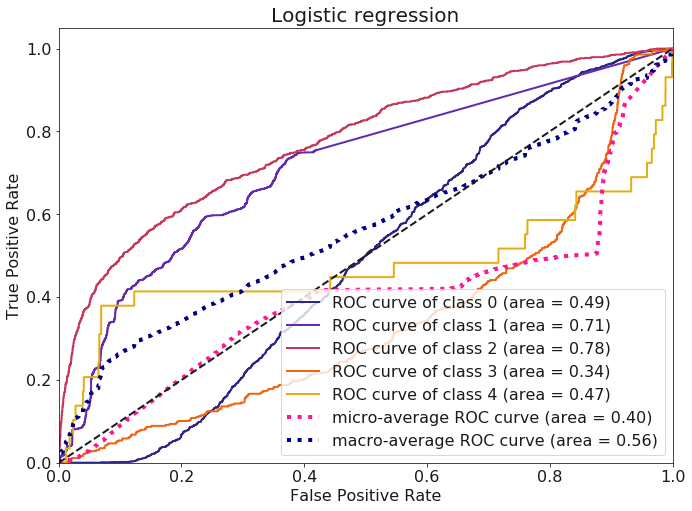

In [104]:
skplt.metrics.plot_roc(y, probabilities, title='Logistic regression', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()

_Seemingly the Logistic regression model evaluates poorly the animal outcomes.Best evaluating the Adoption as an outcome_

- The macro average takes the mean of these three precision scores.

- The micro average sums all true positives and divides by the sum of all true positive and false positives

A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes).

__Decision tree__

In [105]:

# Setting the trees
# max_depth: the maximum number of hierarchical decision nodes (how "deep" the tree is built)
classifier1 = DecisionTreeClassifier(criterion='gini',
                                    max_depth=3)
classifier2 = DecisionTreeClassifier(criterion='gini',
                                    max_depth=10)
classifier3 = DecisionTreeClassifier(criterion='gini',
                                    max_depth=13)
classifier4 = DecisionTreeClassifier(criterion='gini',
                                    max_depth=15)
classifier5 = DecisionTreeClassifier(criterion='gini',
                                    max_depth=None)
# fit 4 trees
classifier1.fit(X_train, y_train)
classifier2.fit(X_train, y_train)
classifier3.fit(X_train, y_train)
classifier4.fit(X_train, y_train)
classifier5.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [106]:
print('Scores on the train data: with Maximum depth as follows: 3, 10, 13, 15, None') 
print(classifier1.score(X_train, y_train))
print(classifier2.score(X_train, y_train))
print(classifier3.score(X_train, y_train))
print(classifier4.score(X_train, y_train))
print(classifier5.score(X_train, y_train))

Scores on the train data: with Maximum depth as follows: 3, 10, 13, 15, None
0.7141218637992831
0.8213620071684588
0.8807168458781361
0.9188530465949821
0.9997132616487455


_It can be seen how achieving completely pure leaves creates overfitting as `max__depth = None` is the worst performing model._

In [107]:
print('Score on the test data:with Maximum depth as follows: 3, 10, 13, 15, None')
print(classifier1.score(X_test, y_test))
print(classifier2.score(X_test, y_test))
print(classifier3.score(X_test, y_test))
print(classifier4.score(X_test, y_test))
print(classifier5.score(X_test, y_test))

Score on the test data:with Maximum depth as follows: 3, 10, 13, 15, None
0.7160535117056857
0.7431438127090301
0.728428093645485
0.7334448160535118
0.702675585284281


_The best score on the test set can be seen with the `max__depth = 8` ._

- Using Cross validation

In [108]:
print('Cross-validated score on the train data: with Maximum depth as follows: 3, 10, 13, 15, None') 
print(cross_val_score(classifier1, X_train, y_train, cv=6).mean())
print(cross_val_score(classifier2, X_train, y_train, cv=6).mean())
print(cross_val_score(classifier3, X_train, y_train, cv=6).mean())
print(cross_val_score(classifier4, X_train, y_train, cv=6).mean())
print(cross_val_score(classifier5, X_train, y_train, cv=6).mean())

Cross-validated score on the train data: with Maximum depth as follows: 3, 10, 13, 15, None
0.7132624669734277
0.739791299313155
0.7407916184778198
0.7254566911495178
0.6999365577652301


In [109]:
print('Cross-validated score on the test data: with Maximum depth as follows: 3, 10, 13, 15, None') 
print(cross_val_score(classifier1, X_test, y_test, cv=6).mean())
print(cross_val_score(classifier2, X_test, y_test, cv=6).mean())
print(cross_val_score(classifier3, X_test, y_test, cv=6).mean())
print(cross_val_score(classifier4, X_test, y_test, cv=6).mean())
print(cross_val_score(classifier5, X_test, y_test, cv=6).mean())

Cross-validated score on the test data: with Maximum depth as follows: 3, 10, 13, 15, None
0.704342912942533
0.7180986528520082
0.7073742962484116
0.7047208722028128
0.6833171250904959


- Feature importances according to the different maximum depth of the trees

In [110]:
print('Maximum depth = 3')
pd.DataFrame(list(zip(X.columns,classifier1.feature_importances_)),columns=
             ['Feature','Importance']).sort_values(by='Importance',ascending=False).head(10)

Maximum depth = 3


,Feature,Importance
3,Type_DOG,0.321513
42,Name_given_name not given,0.215146
0,Age,0.166448
5,Sex_Male,0.132695
15,Intake Type_OWNER SURRENDER,0.085289
4,Type_OTHER,0.043161
19,Intake Subtype_COMM CAT,0.035749
178,Simple color_BLUE CREAM mixed color,0.000000
182,Simple color_BLUE PT mixed color,0.000000
181,Simple color_BLUE PT,0.000000


In [111]:
print('Maximum depth = 10')
pd.DataFrame(list(zip(X.columns,classifier2.feature_importances_)),columns=
             ['Feature','Importance']).sort_values(by='Importance',ascending=False).head(10)

Maximum depth = 10


,Feature,Importance
0,Age,0.183723
3,Type_DOG,0.169913
42,Name_given_name not given,0.163331
5,Sex_Male,0.078383
15,Intake Type_OWNER SURRENDER,0.057645
1,Outcome day,0.038330
40,Intake Condition_TREATABLE/MANAGEABLE,0.034891
30,Intake Subtype_OVER THE COUNTER,0.024215
4,Type_OTHER,0.023521
6,Sex_Neutered,0.020240


In [112]:
print('Maximum depth = 13')
pd.DataFrame(list(zip(X.columns,classifier3.feature_importances_)),columns=
             ['Feature','Importance']).sort_values(by='Importance',ascending=False).head(10)

Maximum depth = 13


,Feature,Importance
0,Age,0.195268
3,Type_DOG,0.138724
42,Name_given_name not given,0.133350
5,Sex_Male,0.065000
15,Intake Type_OWNER SURRENDER,0.048181
1,Outcome day,0.039591
40,Intake Condition_TREATABLE/MANAGEABLE,0.033143
2,Intake day,0.026147
30,Intake Subtype_OVER THE COUNTER,0.022249
4,Type_OTHER,0.019692


In [113]:
print('Maximum depth = 15')
pd.DataFrame(list(zip(X.columns,classifier4.feature_importances_)),columns=
             ['Feature','Importance']).sort_values(by='Importance',ascending=False).head(10)

Maximum depth = 15


,Feature,Importance
0,Age,0.191658
3,Type_DOG,0.123468
42,Name_given_name not given,0.118685
5,Sex_Male,0.058374
1,Outcome day,0.047947
15,Intake Type_OWNER SURRENDER,0.045153
2,Intake day,0.033168
40,Intake Condition_TREATABLE/MANAGEABLE,0.030932
30,Intake Subtype_OVER THE COUNTER,0.023086
6,Sex_Neutered,0.017988


In [114]:
print('Maximum depth = None')
pd.DataFrame(list(zip(X.columns,classifier5.feature_importances_)),columns=
                   ['Feature','Importance']).sort_values(by='Importance',ascending=False).head(10)

Maximum depth = None


,Feature,Importance
0,Age,0.195046
3,Type_DOG,0.099086
42,Name_given_name not given,0.095248
1,Outcome day,0.055686
5,Sex_Male,0.049066
2,Intake day,0.040264
15,Intake Type_OWNER SURRENDER,0.035385
40,Intake Condition_TREATABLE/MANAGEABLE,0.025257
6,Sex_Neutered,0.023001
30,Intake Subtype_OVER THE COUNTER,0.019955


_The trees with the different max_depht, if a tree cut early some features might have higher influence on the outcomes._

In [115]:
# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix

def plot_dt(classifier3, feature_names=None):
    print('Max depth:', classifier3.max_depth)
    dot_data = StringIO() 
    export_graphviz(classifier1, 
                    out_file=dot_data,  
                    filled=True, 
                    rounded=True,
                    special_characters=True,
                    feature_names=feature_names
                   )  

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
    return Image(graph.create_png())  

Max depth: 13


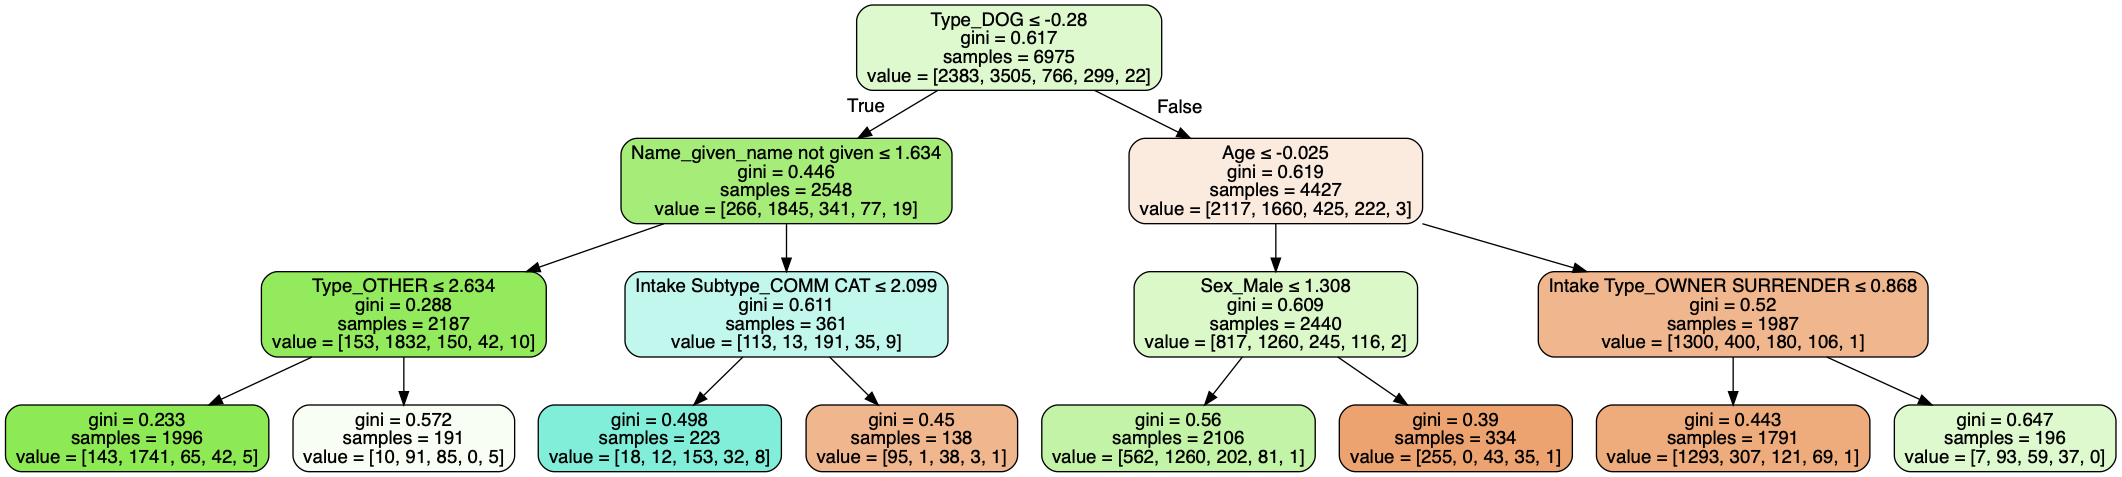

In [116]:
plot_dt(classifier3, feature_names=X.columns)

In [117]:
# gridsearch params
dtc_params = {
    'max_depth':[None]+list(range(1,10)),
    'max_features':range(1,X.shape[1]+1),
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

from sklearn.model_selection import GridSearchCV
# set the gridsearch
model = DecisionTreeClassifier()
dtc_gs = GridSearchCV(model, dtc_params, cv=5, verbose=1, n_jobs=-1, return_train_score=True)

In [118]:
# use the gridearch model to fit the data
dtc_gs.fit(X_train,y_train)

Fitting 5 folds for each of 29150 candidates, totalling 145750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 1512 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 2412 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 3512 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 4812 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 6312 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 8012 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 9912 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 12012 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 14312 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 16812 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 19512 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 22412 tasks  

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_features': range(1, 266), 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [119]:
dtc_best = dtc_gs.best_estimator_
print(dtc_gs.best_params_)
print(dtc_gs.best_score_)

{'max_depth': 8, 'max_features': 176, 'min_samples_split': 2}
0.7554121863799284


In [120]:
model = dtc_gs.best_estimator_
print(dtc_gs.best_estimator_)
print('R2 training: ', dtc_gs.score(X_train, y_train))
print('R2 test: ', dtc_gs.score(X_test, y_test))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=176, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
R2 training:  0.7734767025089606
R2 test:  0.7341137123745819


In [121]:
fi = pd.DataFrame({
        'feature':X.columns,
        'importance':dtc_best.feature_importances_
    })

fi.sort_values('importance', ascending=False, inplace=True)
fi.head(10)

,feature,importance
0,Age,0.234313
42,Name_given_name not given,0.184104
95,Breed type_DOMESTIC SH,0.133928
5,Sex_Male,0.094856
30,Intake Subtype_OVER THE COUNTER,0.062430
15,Intake Type_OWNER SURRENDER,0.045898
40,Intake Condition_TREATABLE/MANAGEABLE,0.038227
11,Size_SMALL,0.029582
4,Type_OTHER,0.026364
19,Intake Subtype_COMM CAT,0.022219


_The features importance ranking is based on an importance measure ranging from 0 to 1, with 1 being the most important. The importance scores of all features add up to 1.
A feature with higher feature importance reduced the criterion (impurity) more than the other features._

_Below, show the feature importances for most important variables sorted by most important feature to least._

In [122]:
probabilities = dtc_best.predict_proba(X_test)
cmap = ListedColormap(sns.color_palette("husl",3))

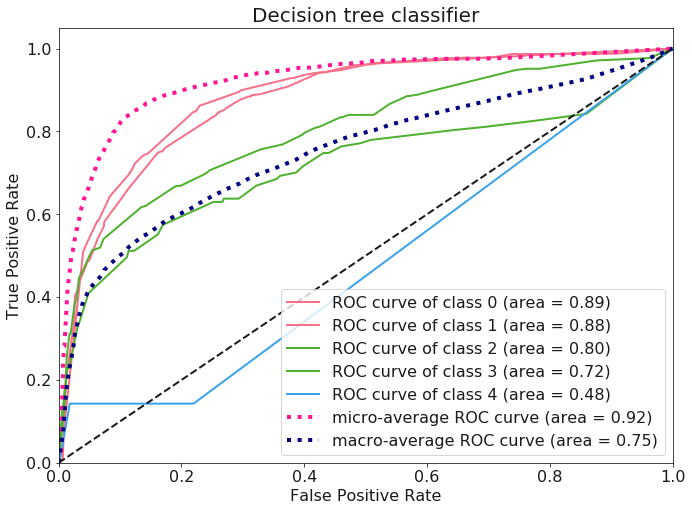

In [123]:
skplt.metrics.plot_roc(y_test, probabilities, title='Decision tree classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()

_The Decision tree model far exceeds the performance of Logistic regression model._
_Evaluating the Euthanise and Adoption quite well._

__Random Forest__

In [124]:
from sklearn.ensemble import RandomForestClassifier

_Next, using the training dataset (both dependent and independent to train the random forest)_

In [125]:
# Fitting Random Forest Classification to the Training set
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 2)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

_Score on the train set_

In [126]:
print(rf_classifier.score(X_train, y_train))

0.988673835125448


_Score on the test set_

In [127]:
rf_classifier.score(X_test, y_test)

0.748494983277592

In [128]:
probabilities = rf_classifier.predict_proba(X_test)
cmap = ListedColormap(sns.color_palette("husl",3))

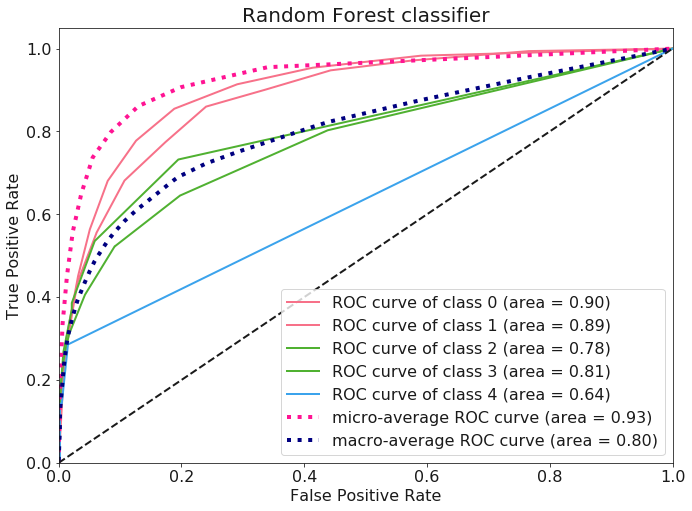

In [129]:
skplt.metrics.plot_roc(y_test, probabilities, title='Random Forest classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()

_The Random Forest model has a similar performance. Best evaluating the Euthanise as outcome, and worst evaluating Death._
_

In [130]:
importances = pd.DataFrame(list(zip(classifier3.feature_importances_, rf_classifier.feature_importances_,)),
                           index=X.columns, columns=['Decision tree importance', 'Random forest importance']).sort_values('Random forest importance', 
                            ascending=False).head(10)
importances

,Decision tree importance,Random forest importance
Age,0.195268,0.133796
Outcome day,0.039591,0.061879
Intake day,0.026147,0.053832
Name_given_name not given,0.133350,0.047881
Sex_Neutered,0.019424,0.040433
Intake Condition_TREATABLE/MANAGEABLE,0.033143,0.029044
Type_DOG,0.138724,0.028733
Intake Subtype_OVER THE COUNTER,0.022249,0.027706
Sex_Spayed,0.009833,0.026289
Intake Type_OWNER SURRENDER,0.048181,0.025577


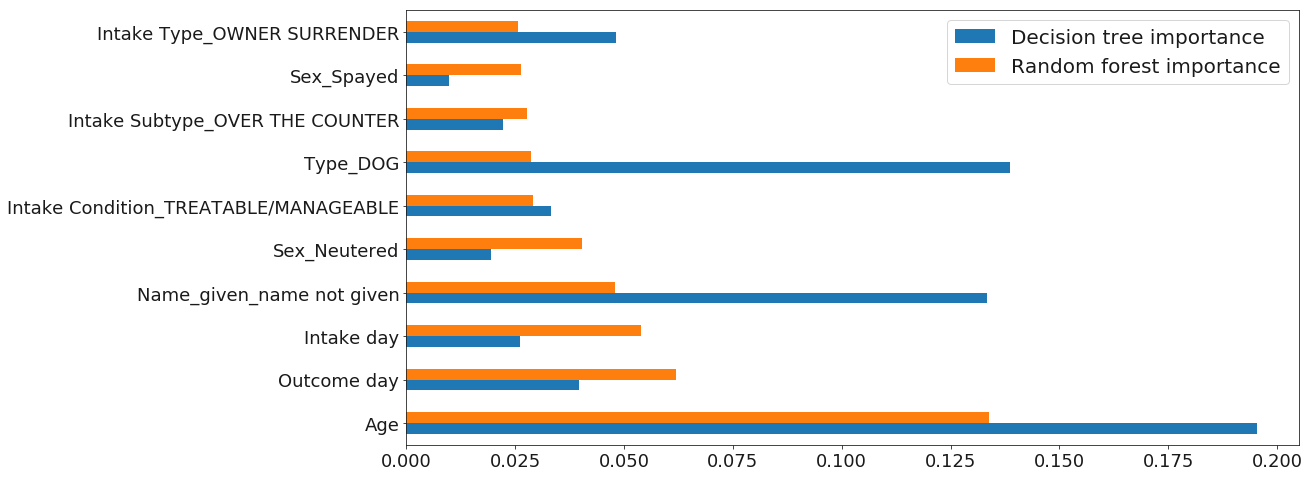

In [131]:
fig, ax = plt.subplots(figsize=(16, 8))
importances.plot(kind='barh', ax=ax, fontsize=18)
plt.legend(fontsize=20)
plt.show()

__Boosting__

_Ada Boost_

In [132]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [133]:
param_grid_abc = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              'n_estimators': [10, 100, 1000]
             }

0.6174910394265233
0.6088848999473234
0.5929765886287626
0.5929765886287626


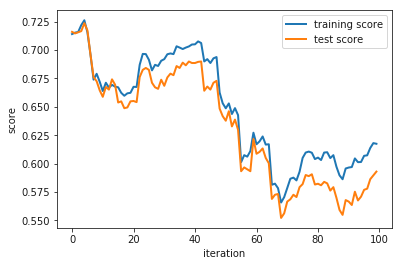

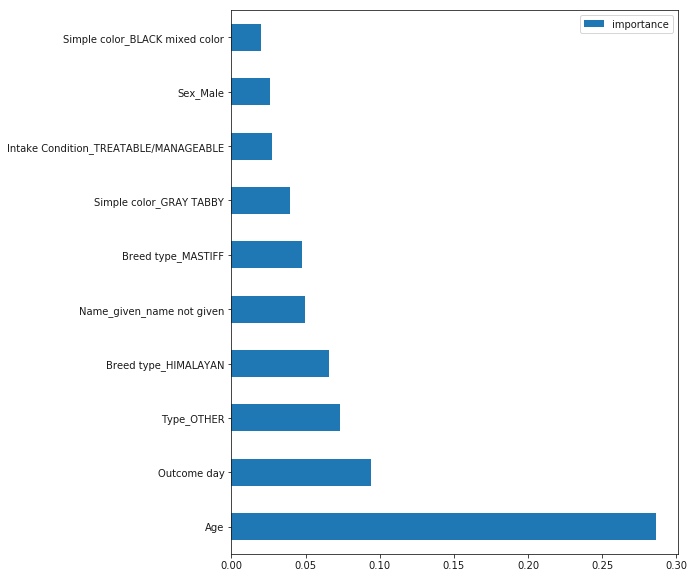

In [134]:
base_estimator = DecisionTreeClassifier(max_depth=3)
classifier_adab = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=1)
classifier_adab.fit(X_train, y_train)

print(classifier_adab.score(X_train,y_train))
print(cross_val_score(classifier_adab, X_train, y_train , cv=5).mean())
print(classifier_adab.score(X_test, y_test))
print(pd.DataFrame(classifier_adab.staged_predict(X_test)).T.apply(lambda x: accuracy_score(y_test, x), axis=0)[classifier_adab.n_estimators-1])

plt.plot(list(classifier_adab.staged_score(X_train, y_train)), label='training score', lw=2)
plt.plot(list(classifier_adab.staged_score(X_test, y_test)), label ='test score', lw=2)
plt.xlabel('iteration')
plt.ylabel('score')
plt.legend()
plt.show()

pd.DataFrame(classifier_adab.feature_importances_,
             columns=['importance'], 
             index = X.columns
            ).sort_values(by='importance', ascending=False
            ).head(10).plot(kind='barh', figsize=(8,10));

In [135]:
ABC = AdaBoostClassifier(base_estimator = base_estimator)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid_abc)

In [136]:
param_test1 = {'max_depth':range(5,16,2), 'n_estimators':range(400,1501,100)}

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=400, 
                                                               max_features='sqrt', subsample=0.8, random_state=10), 
                        param_grid = param_test1, n_jobs=-1,iid=False, cv=5)

In [137]:
grid_search_ABC.fit(X_train,y_train)

/Users/klara/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'base_estimator__criterion': ['gini', 'entropy'], 'base_estimator__splitter': ['best', 'random'], 'n_estimators': [10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [138]:
grid_search_ABC.score(X_test,y_test)

0.6267558528428093

_Interesting how the training score has just a little higher performance through the iteration._

In [139]:
probabilities = classifier_adab.predict_proba(X_test)
cmap = ListedColormap(sns.color_palette("husl",3))

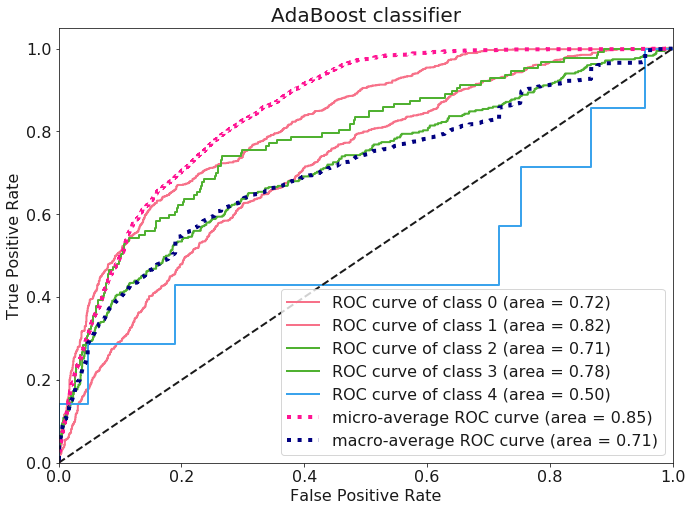

In [140]:
skplt.metrics.plot_roc(y_test, probabilities, title='AdaBoost classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()

__Questions?__


__Ideas__